# Analysing Iris Dataset using K-Means CLustering Algorithm

This is very simple Machine learning project based on K-Means Clustering Algorithm under unsupervised machine learning algorithms.

In Iris Dataset, Iris is beautiful flower, The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper.

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray


In [2]:
# Libraries or importing Dependencies.

import numpy as numpy # useful for making numpy arrays.
import pandas as pd # used to create dataframes i.e. Structured table. we can make dataframes of (.csv) files for better analysis.
import matplotlib.pyplot as plt # data visualisation libraries
import seaborn as sns # data visualisation libraries
from sklearn.cluster import KMeans # useful for K Means clustering Algorithm



In [3]:
# Fetching data from iris.csv file into pandas dataframe.
# iris dataset comes with the seaborn library. so we don't need to fetch it externally.

df = sns.load_dataset('iris')
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


# Analysis of Data

In [4]:
df.shape

(150, 5)

Iris dataset have 150 records with 5 attributes.

In [5]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
# checking for missing values
df.isnull().sum()

# if there was missing values then we need to follow various methods called imputation to replace those missing values with suitable values.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Visualisation of Data

In [11]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


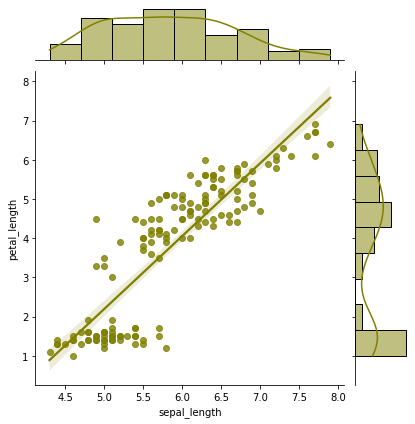

In [14]:
sns.jointplot(x='sepal_length',y='petal_length',data=df,color='olive',kind='reg')
plt.show()

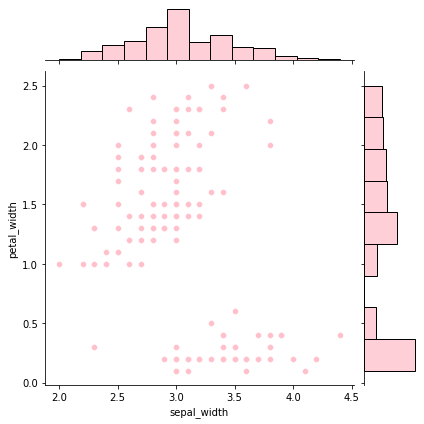

In [16]:
sns.jointplot(x='sepal_width',y='petal_width',data=df,color='pink')
plt.show()

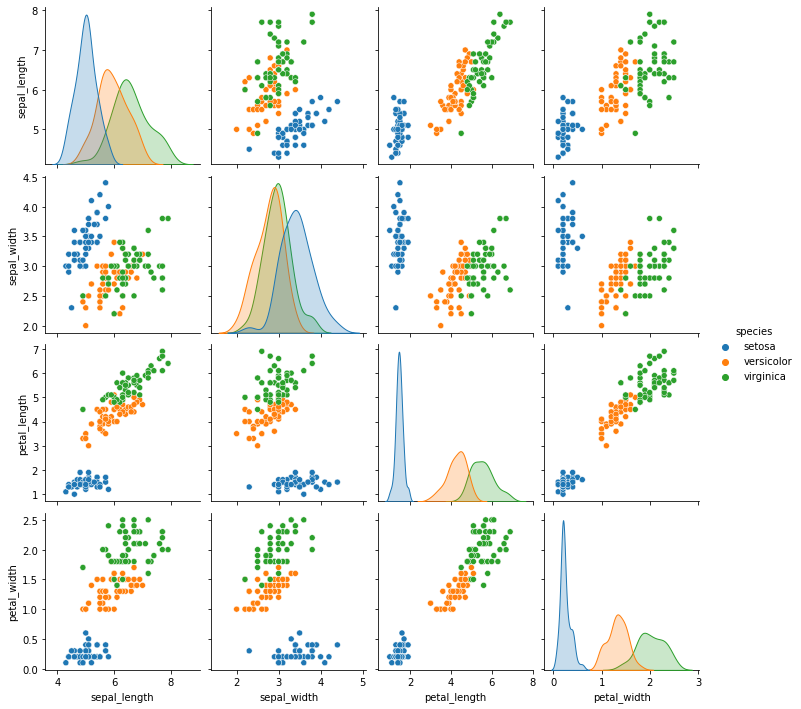

In [17]:
sns.pairplot(df,hue='species')
plt.show()

# Finding the optimum number of clusters for k-means classification

For finding the optimum number of clusters for k-means classification we use elbow graph.

Based on the elbow graph we can determine optimal number of cluster required.

In [23]:
X = df.iloc[:,[0,1,2,3]].values
# iloc[starting_indexof_records:ending_indexof_records,[indexof_attribute]]
print(X)
# this is called Data Points

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [24]:
# finding wcss value for different number of clusters

# Initailly we will find wcss value for when we consider one cluster, then we will find wcss value for when we consider two clusters, ..., then we will find wcss value for when we consider N clusters.
# we need to determine for which number of cluster we get minimum wcss value. suppose we have noticed that for 3 no. of cluster we have minimum wcss value then we will have Three clusters i.e. Three different categories.

wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)

  wcss.append(kmeans.inertia_)

  

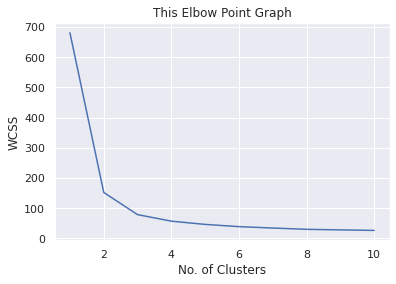

In [25]:
# plot as elbow graph

sns.set()
plt.plot(range(1,11),wcss)
plt.title('This Elbow Point Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above elbow graph we can determine that 3 clusters will be required for K-Means clustering of the iris dataset.

Here we will choose value 3 i.e. 3 No. of clusters. 
because after that point of value there is no significant drop of values.

***Optimum number of clusters = 3***

# Fit to K-means Clustering Algorithm

Training the k-means Clustering Model

In [26]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=0)

# return a label for each data point based on their cluster. 
# here we required 3 clusters so cluster will be labeled as cluster 0, cluster 1, cluster 2
# Here we have 150 data point, and each data points contains 4 values.

Y = kmeans.fit_predict(X)
print(Y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


# Visualizing the cluster.

Text(0.5, 1.0, 'Species Category')

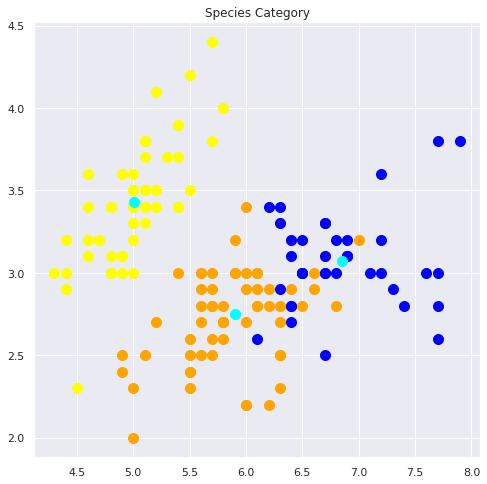

In [34]:
# Plotting all the clusters and their Centeriods

# 3 CLusters: - 0,1,2

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1],s=100,c='orange',label='Iris-setosa')
plt.scatter(X[Y==1,0], X[Y==1,1],s=100,c='yellow',label='Iris-versicolour')
plt.scatter(X[Y==2,0], X[Y==2,1],s=100,c='blue',label='Iris-virginica')

#plot the centroids 
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids' )
plt.title('Species Category')



End of the Project